# Model K-prototypes

This Jupyter notebook is used to:

1. Run K-prototypes.
2. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.40940,0.05894,0.02980,0.75410,0.00139,0.00030,0.00016,0.00684,0.00012,...,77291,44,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:33:32.199062Z
1,1.00000,0.69959,0.05896,0.02978,0.75419,0.00253,0.00048,0.00018,0.00684,0.00006,...,36392,29,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:33:32.258791Z
2,1.00000,0.76739,0.09980,0.00020,0.75566,0.00365,0.00047,0.00008,0.00684,0.00001,...,3696,9,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:35:59.291704Z
3,1.00000,0.06320,0.10769,0.00002,0.00183,0.00008,0.00001,0.00001,0.00186,0.00000,...,76,1,udp,ntp,SF,orig_well_known,resp_123,No,No,2017-07-06T12:36:27.694263Z
4,1.00000,0.85747,0.08774,0.00000,0.75071,0.00000,0.00000,0.00000,0.00208,0.00000,...,180,2,udp,dns,SHR,orig_reg_or_dyn,resp_well_known,No,No,2017-07-06T12:35:15.878393Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.85747,0.42898,0.00004,0.47069,0.00010,0.00002,0.00001,0.00078,0.00000,...,320,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:55:44.276459Z
1,1.00000,0.85747,0.99878,0.00036,0.93301,0.00008,0.00001,0.00001,0.00078,0.00000,...,132,1,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T13:29:55.486171Z
2,1.00000,0.85747,0.01966,0.00000,0.68743,0.00011,0.00002,0.00001,0.00078,0.00000,...,234,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:31:10.784628Z
3,1.00000,0.45589,0.52394,0.00011,0.03215,0.00089,0.00015,0.00006,0.00684,0.00001,...,5145,11,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T13:01:26.126708Z
4,1.00000,0.30919,0.62093,0.00403,0.81171,0.00000,0.00003,0.00003,0.00120,0.00000,...,92,2,tcp,none,SF,orig_reg_or_dyn,resp_80,No,No,2017-07-06T13:07:15.275176Z


## 1. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 40741 rows and 296 columns


In [6]:
# selected_df.info()

In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode          3
orig_orig_connection.service_mode           6
orig_orig_connection.conn_state_mode        2
orig_resp_connection.protocol_mode          4
orig_resp_connection.service_mode           5
orig_resp_connection.conn_state_mode        4
resp_orig_connection.protocol_mode          3
resp_orig_connection.service_mode           4
resp_orig_connection.conn_state_mode        3
resp_resp_connection.protocol_mode          3
resp_resp_connection.service_mode           7
resp_resp_connection.conn_state_mode       10
uid                                     40741
originated_ip                              16
responded_ip                             2569
protocol                                    3
service                                    14
conn_state                                 12
orig_p_cat                                  2
resp_p_cat                                  9
attacker_label                              2
victim_label                      

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [10]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [12]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [13]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [14]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=182)

In [15]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [8, 9, 10, 11, 12, 56, 57, 58, 97, 98, 99, 138, 139, 140, 179, 180, 181]


In [16]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.4289788718335341, 4.495323722521205e-05, 0.4706932596786253,
        ..., 'udp', 'dns', 'SF'],
       [0.9987811361576298, 0.000362164450824, 0.9330088049930568, ...,
        'udp', 'dns', 'SF'],
       [0.0196599334139475, 1.6223835105216858e-07, 0.6874303764630479,
        ..., 'udp', 'dns', 'SF'],
       ...,
       [0.918624378798228, 1.726847389970851e-05, 0.9464680838076636,
        ..., 'udp', 'dns', 'SF'],
       [0.3594530971409655, 0.0002718909212807, 0.659184202896339, ...,
        'udp', 'dns', 'SF'],
       [0.4492596065271385, 0.1376293735961408, 0.769254246082007, ...,
        'tcp', 'ssl', 'SF']], dtype=object)

In [17]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
#for cluster in range(1, 15):
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:33:59.
Cluster initiation:  1 (00:34:32), gamma: 0.10494551753587487
Cluster initiation:  2 (00:35:27), gamma: 0.10494551753587487
Cluster initiation:  3 (00:36:56), gamma: 0.10494551753587487
Cluster initiation:  4 (00:39:01), gamma: 0.10494551753587487
Cluster initiation:  5 (00:41:09), gamma: 0.10494551753587487
Cluster initiation:  6 (00:43:05), gamma: 0.10494551753587487
Cluster initiation:  7 (00:45:11), gamma: 0.10494551753587487
Done at 00:45:11.


In [18]:
print_info

['Cluster initiation:  1 (00:34:32), gamma: 0.10494551753587487',
 'Cluster initiation:  2 (00:35:27), gamma: 0.10494551753587487',
 'Cluster initiation:  3 (00:36:56), gamma: 0.10494551753587487',
 'Cluster initiation:  4 (00:39:01), gamma: 0.10494551753587487',
 'Cluster initiation:  5 (00:41:09), gamma: 0.10494551753587487',
 'Cluster initiation:  6 (00:43:05), gamma: 0.10494551753587487',
 'Cluster initiation:  7 (00:45:11), gamma: 0.10494551753587487']

In [19]:
cost

[183655.81617400522,
 128284.79923699878,
 85286.68201810705,
 74666.44331428851,
 65581.94491930857,
 59664.92841901834,
 55592.69931319502]

In [20]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': cost})

In [21]:
df_cost

,Cluster,Cost
0,1,183655.81617
1,2,128284.79924
2,3,85286.68202
3,4,74666.44331
4,5,65581.94492
5,6,59664.92842
6,7,55592.69931


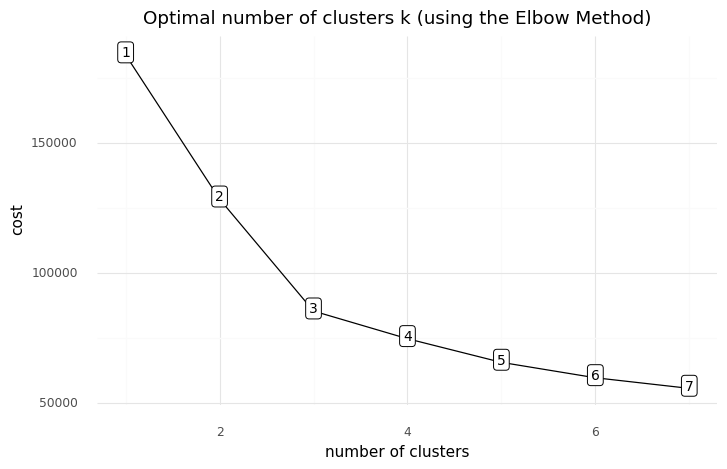

<ggplot: (8779333488107)>

In [22]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [54]:
# Fit the cluster
OPTIMAL_K = 5

kprototype = computed_clusters[OPTIMAL_K]
#kprototype = computed_clusters[0]

In [55]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.23841887837486375', '0.0004570012756294246',
        '0.7299582815081345', ..., 'udp', 'dns', 'SF'],
       ['0.4452027020822021', '0.039949595777797726',
        '0.6810273746492745', ..., 'tcp', 'ssl', 'SF'],
       ['0.417384970495689', '0.00015287870150481098',
        '0.9326381262210667', ..., 'udp', 'dns', 'SF'],
       ['0.39420419363583004', '0.024509449035089448',
        '0.502146526331069', ..., 'tcp', 'http', 'SF'],
       ['0.7374103027199027', '0.00033316506431290506',
        '0.7177974849611156', ..., 'udp', 'dns', 'SF'],
       ['0.46022895257506025', '0.004782125879705211',
        '0.7564623453061956', ..., 'tcp', 'none', 'SF']], dtype='<U32')

In [56]:
# Check the iteration of the clusters created
kprototype.n_iter_

8

In [57]:
# Check the cost of the clusters created
kprototype.cost_

59664.92841901834

In [58]:
# df.drop('Cluster Labels', axis=1, inplace=True)
# df.drop('cluster', axis=1, inplace=True)
# df.head()

In [59]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [60]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [61]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=184)

In [62]:
df['cluster'].value_counts()

0    10611
2     8321
1     7733
3     6353
4     5994
5     1729
Name: cluster, dtype: int64

## 2. Results

In [63]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

,cluster_cat,cluster,protocol,service,conn_state,orig_p_cat,resp_p_cat,connection.time,connection.duration,connection.orig_bytes,connection.orig_pkts,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count
0,0,10611,udp,dns,SF,orig_reg_or_dyn,resp_53,0.23842,0.00046,0.00017,0.00002,0.00000,0.00001,0.98059,0.00000,0.00000,0.00000,0.00000
1,1,7733,tcp,ssl,SF,orig_reg_or_dyn,resp_443,0.44520,0.03995,0.00308,0.00017,0.00005,0.00017,0.00000,0.00000,0.00000,0.99547,0.01587
2,2,8321,udp,dns,SF,orig_reg_or_dyn,resp_53,0.41738,0.00015,0.00010,0.00001,0.00000,0.00001,0.99844,0.00000,0.00012,0.00012,0.00000
3,3,6353,tcp,http,SF,orig_reg_or_dyn,resp_80,0.39420,0.02451,0.00110,0.00024,0.00018,0.00023,0.00834,0.00346,0.47033,0.00157,0.01113
4,4,5994,udp,dns,SF,orig_reg_or_dyn,resp_53,0.73741,0.00033,0.00019,0.00002,0.00000,0.00001,0.96980,0.00000,0.00000,0.00000,0.00001
5,5,1729,tcp,none,SF,orig_reg_or_dyn,resp_80,0.46023,0.00478,0.00330,0.00010,0.00001,0.00005,0.00000,0.06189,0.07403,0.00000,0.03199


In [64]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

,cluster_cat,cluster,orig_orig_total,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean
0,0,10611,0.38334,udp,dns,SF,0.23816,0.30630,0.02844,0.09585,0.06224,0.09716
1,1,7733,0.27356,udp,dns,SF,0.44215,0.31724,0.02972,0.08165,0.04363,0.08284
2,2,8321,0.45020,udp,dns,SF,0.41600,0.00534,0.00194,0.00291,0.00190,0.00760
3,3,6353,0.25296,udp,dns,SF,0.39524,0.31020,0.02883,0.07126,0.03648,0.07283
4,4,5994,0.14293,udp,dns,SF,0.73370,0.32146,0.02930,0.05499,0.01694,0.05714
5,5,1729,0.09842,tcp,none,SF,0.45891,0.12807,0.08448,0.06547,0.00755,0.03507


In [65]:
pd.DataFrame(kprototype.cluster_centroids_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
0,0.23841887837486375,0.0004570012756294246,0.7299582815081345,0.00017373589298914604,1.6075315518113648e-05,0.00112101537464047,3.874412536165346e-07,1.2117976611451754e-05,0.9805861841485252,0.0,0.0,0.0,2.2560723747507245e-20,0.3833375452267218,0.23816256613447537,0.3062980088961807,0.09585025044478139,0.02844223358759373,0.06224290112507582,0.09715940006545545,0.20719039650331683,0.37241686586734146,0.3415323720667232,0.21807558194326754,0.31163317949873576,0.3346520297225325,0.20213517609944126,0.4019231139144032,0.0,0.20488172651022257,0.027269717685322374,0.03961298024063145,0.5534697944767909,0.009113369443979988,0.2426239865723002,0.33171781301159825,0.14675489988300675,0.002305706687261635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00140208923452378,0.23813558481007896,0.014163785523302809,0.04826139176060868,0.02162339957941916,0.015239862657588006,0.027129380223979923,0.02399478801736083,0.0011715348433197158,0.007388559042503069,0.007465298813899321,-1.6011443733709141e-16,0.014601633308310484,1.0938485167226179e-16,0.0,0.0,0.03141177502851834,0.003753966010114771,0.004806333050607869,0.12966725156433637,0.0006954149262665195,0.010228893464189594,0.0,0.01322622783395867,-3.2068924422543634e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7572052759087461,0.24059867690223938,0.014174858920516377,0.12604078422092235,0.1304193301162842,0.07069294189691273,0.09349398213132498,0.02271691455356353,0.757047264421419,0.0,0.0,0.753816904317099,0.004386972180972241,0.001447991790027132,0.01799173088401222,0.0,0.21691326610747472,0.238023434800367,0.0,0.9937970661502478,0.0,0.00420422295615867,0.012279189540051793,0.014585191015313838,0.011488465704367316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6273432553566741,0.23874761683136972,0.0004820777782097986,4.8167325612167296e-05,0.00017632000807260223,1.1656924855325854e-06,3.632409833500154e-05,0.6787910822649293,0.626431812380078,0.0,0.0,0.625135119372885,-3.011366169775967e-19,0.6660428755424406,-2.6157360866675067e-21,0.0,0.3859885154962998,0.06369011304058385,0.0544560676028029,0.9791555839374304,0.0,8.391281366029361e-18,1.1509238781337029e-19,8.64500776643611e-19,0.010390377304493388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,orig_reg_or_dyn,resp_53,udp,dns,SF,udp,dns,SF,-,-,-,udp,dns,SF,udp,dns,SF
1,0.4452027020822021,0.039949595777797726,0.6810273746492745,0.0030832778215912275,0.00016825244779220986,0.006863145275728587,5.187590344963853e-05,0.00016886835758823837,0.0,0.0,0.0,0.9954739428423639,0.015871288409068023,0.27355628292076795,0.44214756126507504,0.3172355253159934,0.0816478901183905,0.029722828569457006,0.04363388762821753,0.0828409428368434,0.1612625427703627,0.2651008342145257,0.319862925126083,0.3044958834432541,0.21749642728271407,0.21941223432610785,0.15397739329114907,0.308358041416634,0.0,0.2443677294935977,0.03188466346360985,0.036423983792404725,0.5232059141672767,0.017447945523315044,0.21171543660532097,0.3928387610545768,0.15935951111100619,5.0866228912161e-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0018295912480433703,0.4444626142911306,0.0006336978305555253,0.03393600995572042,0.009680554458030705,0.006349087937697623,0.01894683493120402,0.01934116350592301,0.0016502331966632884,0.0,0.0,0.0015234116101566827,0.0,0.0016872648451595816,0.0,0.0,0.02458340207886488,0.001034527350316824,0.0

In [66]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [67]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_RESP_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [68]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 259 principal components: 0.9999999999999999


In [69]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999967]
Variance Captured by First  10 Principal Components: [0.9259073]
Variance Captured by First   7 Principal Components: [0.90158982]
Variance Captured by First   5 Principal Components: [0.87160514]
Variance Captured by First   2 Principal Components: [0.75262729]
Variance Captured by the First Principal Component:  [0.63109073]


In [70]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.37541193
Variance of connection.duration                       : 0.25567880
Variance of connection.orig_p                         : 0.06725763
Variance of connection.orig_bytes                     : 0.05427892
Variance of connection.orig_pkts                      : 0.04586969
Variance of connection.resp_p                         : 0.04122915
Variance of connection.resp_bytes                     : 0.03187903
Variance of connection.resp_pkts                      : 0.01714301
Variance of orig_p_cat                                : 0.01284166
Variance of resp_p_cat                                : 0.00973542
Variance of protocol                                  : 0.00809607
Variance of service                                   : 0.00648599
Variance of conn_state                                : 0.00596210
Variance of dns_count                                 : 0.00543643
Variance of ssh_count                                 : 0.0043

In [71]:
pca_X['cluster'] = kprototype.labels_
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,cluster
0,-2.10261,-1.13571,-0.16735,-0.16885,-0.09514,0.11188,0.02912,0.29748,-0.12333,-0.03982,0.20173,-0.40733,-0.25112,0.13263,0.26141,-0.02462,0.01239,-0.09496,-0.16061,0.00346,-0.04023,-0.07960,0.09398,-0.08439,-0.00279,-0.02571,0.07960,-0.02590,0.05180,-0.00257,-0.07065,0.07141,-0.10875,-0.03682,-0.08430,0.03138,0.05332,-0.03276,-0.03924,0.03196,0.02419,0.02736,0.09006,-0.00680,0.06241,-0.00166,0.01144,-0.00898,-0.05594,-0.09657,0.04980,0.06078,0.04416,-0.03489,-0.02409,-0.00674,0.00893,-0.02570,-0.04443,0.03367,0.02107,-0.01201,-0.00550,-0.02049,0.00342,-0.01584,0.01667,0.00136,-0.01944,0.00641,0.02562,-0.00311,0.00258,-0.00355,0.00942,-0.01537,0.00379,0.00135,0.01234,-0.01003,-0.00058,0.00808,0.00417,-0.01096,0.00832,-0.00396,-0.00501,0.00188,-0.00086,-0.01214,0.00290,0.00680,0.00193,0.00273,-0.00128,0.00369,-0.01080,0.00114,-0.00507,-0.00398,0.00112,-0.00261,0.00162,-0.00002,0.00402,-0.00093,-0.00473,0.01139,-0.00107,0.00859,-0.00032,0.00459,-0.00734,0.00434,-0.00085,-0.00111,0.00201,0.00052,-0.00133,0.00449,0.00101,0.00160,0.00041,0.00061,0.00312,-0.00856,0.00332,0.00332,0.00291,-0.00018,-0.00400,-0.00305,-0.00214,0.00078,0.00765,0.00039,-0.00671,0.00074,0.00090,0.00094,-0.00461,0.00117,0.00077,0.00364,0.00030,0.00071,0.00175,0.00102,0.00049,-0.00003,-0.00003,0.00071,-0.00005,0.00025,-0.00003,-0.00022,0.00016,0.00001,0.00001,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0
1,-0.09578,2.48821,0.30749,-1.27998,-0.27273,0.03669,-0.43322,-0.27483,0.25656,0.09213,0.01644,-0.10154,0.07159,-0.33085,-0.11621,-0.09104,-0.39006,-0.15876,-0.00281,0.02994,0.07342,-0.14077,0.01823,-0.13776,-0.00395,-0.34307,0.09199,0.14181,0.00593,0.16514,0.01436,0.02133,0.08125,0.00387,0.08570,-0.07207,-0.05797,0.09095,-0.01859,-0.00385,0.06385,-0.00679,-0.01114,0.00057,0.00629,0.01362,0.01336,-0.00339,-0.01549,-0.00108,-0.01916,0.03875,-0.01827,-0.06659,0.00195,0.04469,-0.10910,0.00435,0.09521,-0.04734,0.02998,0.03911,0.04208,0.01231,0.02076,-0.04876,-0.00526,-0.01038,-0.01657,-0.02193,0.04186,-0.00399,0.00495,0.00590,-0.00377,0.01550,-0.00216,0.00720,-0.00388,-0.00582,0.00304,0.01404,0.00386,-0.02081,-0.00244,0.00149,0.00226,-0.00263,0.00442,-0.00072,0.00407,-0.00310,0.01206,0.02362,-0.00132,0.00261,-0.00912,0.00684,0.00267,0.02245,-0.00401,-0.00541,0.

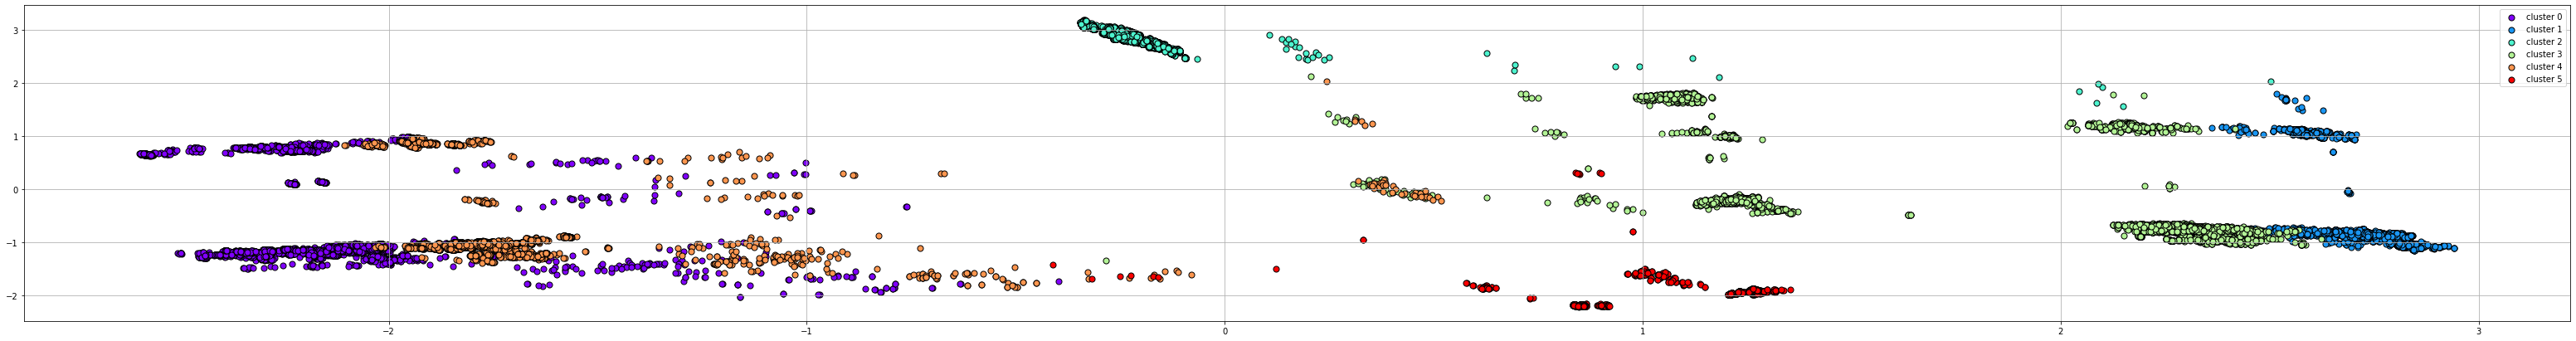

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [73]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kprototype.labels_ == i, 0], 
                   pca_X_array[kprototype.labels_ == i, 1], 
                   pca_X_array[kprototype.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

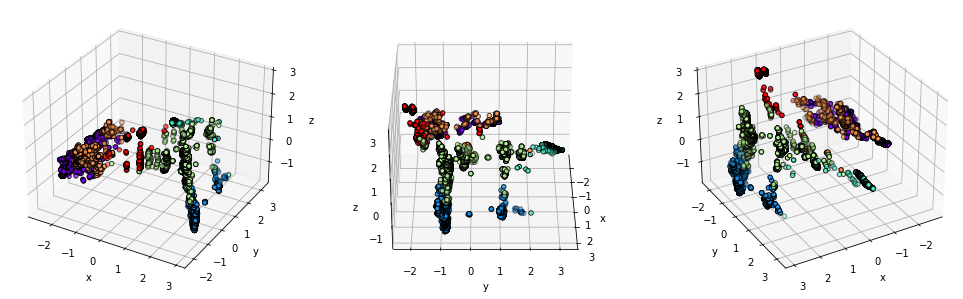

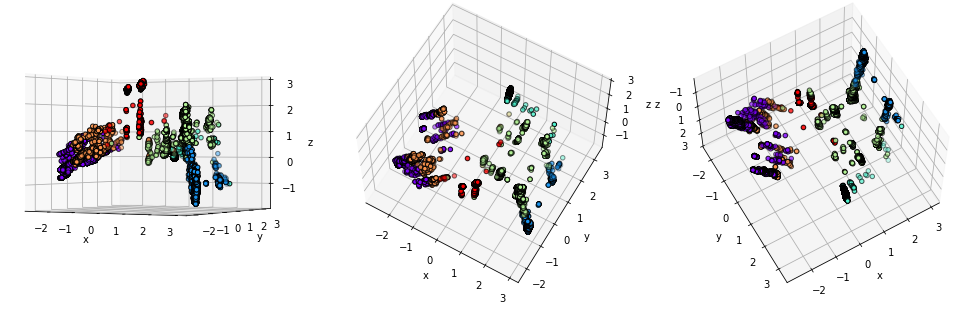

In [74]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [75]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [76]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,cluster,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,-2.10261,-1.13571,-0.16735,-0.16885,-0.09514,0.11188,0.02912,0.29748,-0.12333,-0.03982,0.20173,-0.40733,-0.25112,0.13263,0.26141,-0.02462,0.01239,-0.09496,-0.16061,0.00346,-0.04023,-0.07960,0.09398,-0.08439,-0.00279,-0.02571,0.07960,-0.02590,0.05180,-0.00257,-0.07065,0.07141,-0.10875,-0.03682,-0.08430,0.03138,0.05332,-0.03276,-0.03924,0.03196,0.02419,0.02736,0.09006,-0.00680,0.06241,-0.00166,0.01144,-0.00898,-0.05594,-0.09657,0.04980,0.06078,0.04416,-0.03489,-0.02409,-0.00674,0.00893,-0.02570,-0.04443,0.03367,0.02107,-0.01201,-0.00550,-0.02049,0.00342,-0.01584,0.01667,0.00136,-0.01944,0.00641,0.02562,-0.00311,0.00258,-0.00355,0.00942,-0.01537,0.00379,0.00135,0.01234,-0.01003,-0.00058,0.00808,0.00417,-0.01096,0.00832,-0.00396,-0.00501,0.00188,-0.00086,-0.01214,0.00290,0.00680,0.00193,0.00273,-0.00128,0.00369,-0.01080,0.00114,-0.00507,-0.00398,0.00112,-0.00261,0.00162,-0.00002,0.00402,-0.00093,-0.00473,0.01139,-0.00107,0.00859,-0.00032,0.00459,-0.00734,0.00434,-0.00085,-0.00111,0.00201,0.00052,-0.00133,0.00449,0.00101,0.00160,0.00041,0.00061,0.00312,-0.00856,0.00332,0.00332,0.00291,-0.00018,-0.00400,-0.00305,-0.00214,0.00078,0.00765,0.00039,-0.00671,0.00074,0.00090,0.00094,-0.00461,0.00117,0.00077,0.00364,0.00030,0.00071,0.00175,0.00102,0.00049,-0.00003,-0.00003,0.00071,-0.00005,0.00025,-0.00003,-0.00022,0.00016,0.00001,0.00001,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0,C7Sch34V52gPY5Fbxa,1.00000,192.168.10.12,0.85747,192.168.10.3,2017-07-06T12:55:44.276459Z,0.42898,0.06123,0.00004,udp,dns,SF,0.47069,30848,orig_reg_or_dyn,0.00010,60,0.00001,2,0.00078,53,resp_53,0.00000,264,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1,-0.09578,2.48821,0.30749,-1.27998,-0.27273,0.03669,-0.43322,-0.27483,0.25656,0.09213,0.01644,-0.10154,0.07159,-0.33085,-0.11621,-0.09104,-0.39006,-0.15876

In [78]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [79]:
plt.rcParams["figure.figsize"] = (10,7)

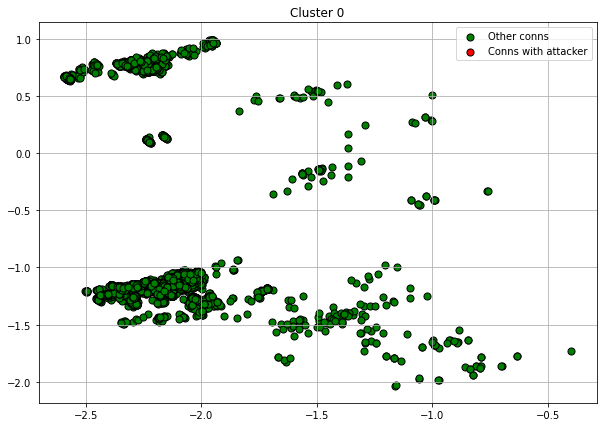

Total num of conns: 10611

Attacker conns ratio:
No    10611
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    2702
192.168.10.19    1725
192.168.10.5     1680
192.168.10.17    1027
192.168.10.9     1009
192.168.10.8      846
192.168.10.12     555
192.168.10.16     485
192.168.10.14     206
192.168.10.50     162
192.168.10.25     145
192.168.10.51      69
Name: originated_ip, dtype: int64

192.168.10.3     10593
192.168.10.19       18
Name: responded_ip, dtype: int64

Cluster 0 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
32594,1.00000,192.168.10.8,0.85747,192.168.10.3,2017-07-06T12:36:05.361299Z,0.10149,0.06161,0.00005,udp,dns,SF,0.86538,56712,orig_reg_or_dyn,0.00025,156,0.00001,2,0.00078,53,resp_53,0.00000,320,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
29733,1.00000,192.168.10.19,0.85747,192.168.10.3,2017-07-06T12:41:42.28819Z,0.19508,0.06284,0.00005,udp,dns,SF,0.98703,64684,orig_reg_or_dyn,0.00012,72,0.00001,2,0.00078,53,resp_53,0.00000,122,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
15567,1.00000,192.168.10.16,0.85747,192.168.10.3,2017-07-06T12:31:11.00394Z,0.01972,0.03108,0.00002,udp,dns,SF,0.57811,37887,orig_reg_or_dyn,0.00012,74,0.00001,2,0.00078,53,resp_53,0.00000,154,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
27147,1.00000,192.168.10.19,0.85747,192.168.10.3,2017-07-06T12:41:37.857222Z,0.19385,0.03330,0.00002,udp,dns,SF,0.08172,5358,orig_reg_or_dyn,0.00013,84,0.00001,2,0.00078,53,resp_53,0.00000,148,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
12969,1.00000,192.168.10.14,0.85747,192.168.10.3,2017-07-06T12:57:55.049711Z,0.46531,0.07827,0.00006,udp,dns,SF,0.87394,57273,orig_reg_or_dyn,0.00021,132,0.00003,4,0.00078,53,resp_53,0.00000,246,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
32483,1.00000,192.168.10.19,0.85747,192.168.10.3,2017-07-06T12:41:41.914463Z,0.19498,0.03127,0.00002,udp,dns,SF,0.43456,28480,orig_reg_or_dyn,0.00010,60,0.00001,2,0.00078,53,resp_53,0.00000,92,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
31660,1.00000,192.168.10.5,0.85747,192.168.10.3,2017-07-06T12:31:22.009478Z,0.02278,0.12623,0.00009,udp,dns,SF,0.98929,64832,orig_reg_or_dyn,0.00019,120,0.00003,4,0.00078,53,resp_53,0.00000,92,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
26153,1.00000,192.168.10.12,0.85747,192.168.10.3,2017-07-06T12:58:46.496846Z,0.47960,0.06345,0.00005,udp,dns,SF,0.40779,26726,orig_reg_or_dyn,0.00013,84,0.00001,2,0.00078,53,resp_53,0.00000,202,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
19565,1.00000,192.168.10.9,0.85747,192.168.10.3,2017-07-06T12:50:12.213329Z,0.33674,0.02372,0.00002,udp,dns,SF,0.92529,60638,orig_reg_or_dyn,0.00009,58,0.00001,2,0.00078,53,resp_53,0.00000,90,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9746,1.00000,192.168.10.5,0.85747,192.168.10.3,2017-07-06T12:56:55.599753Z,0.44879,0.03077,0.00002,udp,dns,SF,0.83994,55045,orig_reg_or_dyn,0.00028,176,0.00003,4,0.00078,53,resp_53,0.00000,200,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     10542
tcp        68
icmp        1
Name: protocol, dtype: int64

Service:
dns                   10414
ntp                     101
none                     52
krb                      18
krb_tcp                   9
gssapi,smb,krb            8
dce_rpc                   6
gssapi,ntlm,smb           2
gssapi,dce_rpc,smb        1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    10485
orig_well_known      126
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            10387
resp_well_known      101
resp_123             101
resp_reg              19
resp_dyn               3
Name: resp_p_cat, dtype: int64




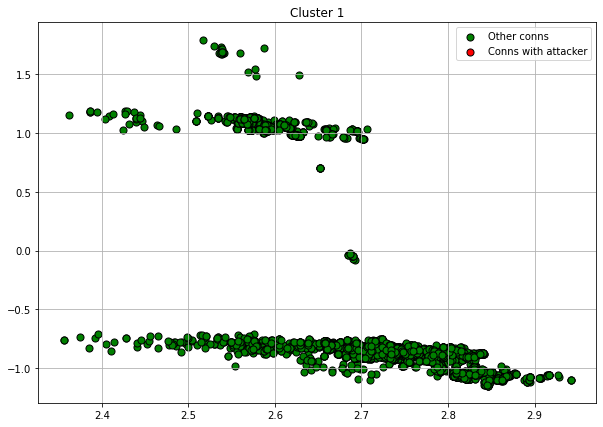

Total num of conns: 7733

Attacker conns ratio:
No    7733
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    1373
192.168.10.19     936
192.168.10.5      894
192.168.10.9      846
192.168.10.12     731
192.168.10.17     707
192.168.10.25     579
192.168.10.14     497
192.168.10.8      474
192.168.10.16     453
192.168.10.51     219
192.168.10.3       24
Name: originated_ip, dtype: int64

162.213.33.50     112
160.17.6.1         62
69.172.216.111     52
64.147.131.201     51
157.240.2.25       45
                 ... 
52.201.45.50        1
130.211.35.197      1
52.84.40.176        1
52.84.26.8          1
66.198.178.90       1
Name: responded_ip, Length: 2031, dtype: int64

Cluster 1 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
19695,1.00000,192.168.10.9,0.08640,23.23.97.184,2017-07-06T12:50:13.816048Z,0.33718,2.34219,0.00172,tcp,ssl,SF,0.02721,1786,orig_reg_or_dyn,0.00114,713,0.00006,9,0.00684,443,resp_443,0.00001,5815,0.00006,10,0.00000,0.00000,0.00000,1.00000,0.03960,No,No
5120,1.00000,192.168.10.15,0.21821,52.19.189.131,2017-07-06T12:37:21.54568Z,0.12265,61.66508,0.04527,tcp,ssl,SF,0.79156,51875,orig_reg_or_dyn,0.00197,1231,0.00011,17,0.00684,443,resp_443,0.00001,4503,0.00008,15,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
13204,1.00000,192.168.10.8,0.21050,50.97.99.189,2017-07-06T12:36:03.613859Z,0.10100,6.70467,0.00492,tcp,ssl,SF,0.75326,49365,orig_reg_or_dyn,0.01109,6920,0.00023,36,0.00684,443,resp_443,0.00011,69084,0.00026,47,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
6546,1.00000,192.168.10.17,0.00763,5.196.119.249,2017-07-06T12:47:35.897127Z,0.29331,10.31931,0.00758,tcp,ssl,SF,0.72086,47242,orig_reg_or_dyn,0.00173,1077,0.00006,10,0.00684,443,resp_443,0.00000,731,0.00004,8,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
35753,1.00000,192.168.10.25,0.47114,107.178.255.114,2017-07-06T13:18:32.939471Z,0.80918,0.17230,0.00013,tcp,ssl,SF,0.76172,49919,orig_reg_or_dyn,0.00018,112,0.00004,7,0.00684,443,resp_443,0.00001,3757,0.00003,6,0.00000,0.00000,0.00000,1.00000,0.02970,No,No
1895,1.00000,192.168.10.25,0.70927,160.17.6.1,2017-07-06T12:35:46.658694Z,0.09629,1.13916,0.00084,tcp,ssl,SF,0.75454,49449,orig_reg_or_dyn,0.00123,769,0.00018,28,0.00684,443,resp_443,0.00006,36894,0.00020,36,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
4921,1.00000,192.168.10.9,0.91047,204.79.197.200,2017-07-06T12:59:09.010723Z,0.48585,19.68799,0.01445,tcp,ssl,RSTO,0.03078,2020,orig_reg_or_dyn,0.00246,1533,0.00008,13,0.00684,443,resp_443,0.00001,7642,0.00009,16,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
5108,1.00000,192.168.10.17,0.51340,116.253.191.237,2017-07-06T13:18:24.964296Z,0.80696,5.71906,0.00420,tcp,ssl,SF,0.86744,56847,orig_reg_or_dyn,0.00060,372,0.00008,13,0.00684,443,resp_443,0.00001,3211,0.00005,9,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
22739,1.00000,192.168.10.5,0.08638,23.21.240.237,2017-07-06T12:51:32.95166Z,0.35916,60.56408,0.04446,tcp,ssl,SF,0.76660,50239,orig_reg_or_dyn,0.00143,893,0.00010,15,0.00684,443,resp_443,0.00001,3210,0.00008,15,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
24734,1.00000,192.168.10.25,0.70927,160.17.6.1,2017-07-06T12:35:54.48309Z,0.09847,0.78290,0.00057,tcp,ssl,SF,0.75518,49491,orig_reg_or_dyn,0.00172,1073,0.00010,15,0.00684,443,resp_443,0.00001,5803,0.00008,14,0.00000,0.00000,0.00000,1.00000,0.01980,No,No


Protocol:
tcp    7733
Name: protocol, dtype: int64

Service:
ssl     7698
none      35
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    7733
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           7652
resp_well_known      71
resp_80               8
resp_reg              2
Name: resp_p_cat, dtype: int64




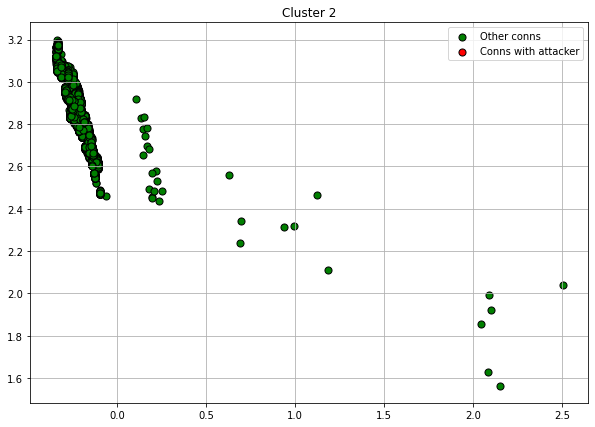

Total num of conns: 8321

Attacker conns ratio:
No    8321
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    8321
Name: originated_ip, dtype: int64

192.168.10.1      8290
192.168.10.255      21
65.52.108.189        2
224.0.1.24           2
224.0.0.252          2
131.253.34.255       1
65.52.108.205        1
65.55.44.108         1
72.21.91.29          1
Name: responded_ip, dtype: int64

Cluster 2 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
28343,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:50:51.469808Z,0.34764,0.15096,0.00011,udp,dns,SF,0.92941,60908,orig_reg_or_dyn,0.00008,50,0.00001,1,0.00078,53,resp_53,0.00000,132,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
2283,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T13:29:12.96681Z,0.98697,0.07681,0.00006,udp,dns,SF,0.94207,61738,orig_reg_or_dyn,0.00009,57,0.00001,1,0.00078,53,resp_53,0.00000,118,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
37854,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:39:38.828032Z,0.16079,0.03049,0.00002,udp,dns,SF,0.94111,61675,orig_reg_or_dyn,0.00009,54,0.00001,1,0.00078,53,resp_53,0.00000,110,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
15088,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:43:40.494432Z,0.22792,0.00049,0.00000,udp,dns,SF,0.93302,61145,orig_reg_or_dyn,0.00008,47,0.00001,1,0.00078,53,resp_53,0.00000,109,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
34200,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:45:38.623911Z,0.26074,0.13352,0.00010,udp,dns,SF,0.93046,60977,orig_reg_or_dyn,0.00007,45,0.00001,1,0.00078,53,resp_53,0.00000,216,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
34580,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T13:29:59.055826Z,0.99977,0.00053,0.00000,udp,dns,SF,0.95259,62427,orig_reg_or_dyn,0.00009,55,0.00001,1,0.00078,53,resp_53,0.00000,71,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
6951,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T13:18:17.867446Z,0.80499,0.09971,0.00007,udp,dns,SF,0.93124,61028,orig_reg_or_dyn,0.00009,56,0.00001,1,0.00078,53,resp_53,0.00000,97,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
37508,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:39:09.840409Z,0.15274,0.03093,0.00002,udp,dns,SF,0.92471,60600,orig_reg_or_dyn,0.00008,47,0.00001,1,0.00078,53,resp_53,0.00000,63,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
11952,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:41:53.36318Z,0.19816,0.03055,0.00002,udp,dns,SF,0.92033,60313,orig_reg_or_dyn,0.00009,57,0.00001,1,0.00078,53,resp_53,0.00000,142,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
6258,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:37:41.114451Z,0.12809,0.07093,0.00005,udp,dns,SF,0.92382,60542,orig_reg_or_dyn,0.00007,42,0.00001,1,0.00078,53,resp_53,0.00000,163,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    8315
tcp       6
Name: protocol, dtype: int64

Service:
dns     8308
none      11
ssl        1
http       1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8298
orig_well_known      23
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8290
resp_well_known      23
resp_443              5
resp_reg              2
resp_80               1
Name: resp_p_cat, dtype: int64




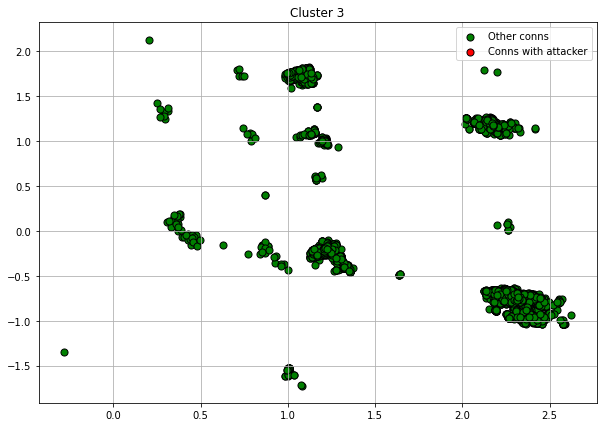

Total num of conns: 6353

Attacker conns ratio:
No    6353
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    1168
192.168.10.17    1095
192.168.10.15     935
192.168.10.14     717
192.168.10.9      602
192.168.10.12     441
192.168.10.16     426
192.168.10.5      354
192.168.10.8      168
192.168.10.51     164
192.168.10.50     147
192.168.10.25     134
192.168.10.3        2
Name: originated_ip, dtype: int64

178.255.83.1       369
23.50.75.27        318
23.60.139.27       279
72.21.91.29        225
50.63.243.230      183
                  ... 
216.58.219.194       1
54.182.221.86        1
199.38.183.176       1
54.192.36.254        1
204.237.173.131      1
Name: responded_ip, Length: 872, dtype: int64

Cluster 3 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
5586,1.00000,192.168.10.17,0.39857,91.189.91.157,2017-07-06T12:43:54.0341Z,0.23168,0.03662,0.00003,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
38951,1.00000,192.168.10.15,0.13967,34.206.104.106,2017-07-06T12:41:59.507178Z,0.19987,60.22995,0.04422,tcp,http,SF,0.80156,52530,orig_reg_or_dyn,0.00502,3132,0.00007,11,0.00120,80,resp_80,0.00000,2527,0.00007,12,0.00000,0.00000,1.00000,0.00000,0.00000,No,No
15188,1.00000,192.168.10.19,0.57028,129.128.12.20,2017-07-06T12:56:56.270896Z,0.44898,0.08715,0.00006,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
39113,1.00000,192.168.10.14,0.76739,172.217.10.2,2017-07-06T13:20:40.161501Z,0.84452,115.70338,0.08494,tcp,http,SF,0.92607,60689,orig_reg_or_dyn,0.00117,732,0.00011,17,0.00120,80,resp_80,0.00000,494,0.00008,15,0.00000,0.00000,1.00000,0.00000,0.00990,No,No
25297,1.00000,192.168.10.12,0.76739,172.217.11.46,2017-07-06T13:28:43.694136Z,0.97884,75.22755,0.05523,tcp,http,S1,0.76814,50340,orig_reg_or_dyn,0.00210,1311,0.00010,15,0.00120,80,resp_80,0.00000,2238,0.00007,12,0.00000,0.00000,1.00000,0.00000,0.05941,No,No
9521,1.00000,192.168.10.5,0.08688,23.50.75.27,2017-07-06T12:46:48.104948Z,0.28004,5.89614,0.00433,tcp,none,SF,0.76188,49930,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
35827,1.00000,192.168.10.5,0.08688,23.50.75.27,2017-07-06T12:39:03.766419Z,0.15105,5.50995,0.00404,tcp,none,SF,0.75970,49787,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00002,3,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
10292,1.00000,192.168.10.19,0.87143,195.186.4.101,2017-07-06T12:33:04.269494Z,0.05118,0.12071,0.00009,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
29308,1.00000,192.168.10.9,0.20909,50.18.61.122,2017-07-06T12:50:13.555089Z,0.33711,0.18054,0.00013,tcp,http,SF,0.02699,1772,orig_reg_or_dyn,0.00118,735,0.00003,5,0.00120,80,resp_80,0.00000,656,0.00002,4,0.00000,0.00000,1.00000,0.00000,0.00990,No,No
11416,1.00000,192.168.10.50,0.56592,128.138.141.172,2017-07-06T12:30:14.448566Z,0.00401,0.05955,0.00004,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes


Protocol:
tcp    4667
udp    1686
Name: protocol, dtype: int64

Service:
http                  2976
none                  1638
ntp                   1594
dns                     53
ftp-data                51
ssh                     22
ssl                     10
ftp                      8
gssapi,dce_rpc,smb       1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4687
orig_well_known    1666
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            4229
resp_123           1594
resp_443            355
resp_well_known      84
resp_reg             53
resp_22              22
resp_dyn              8
resp_21               8
Name: resp_p_cat, dtype: int64




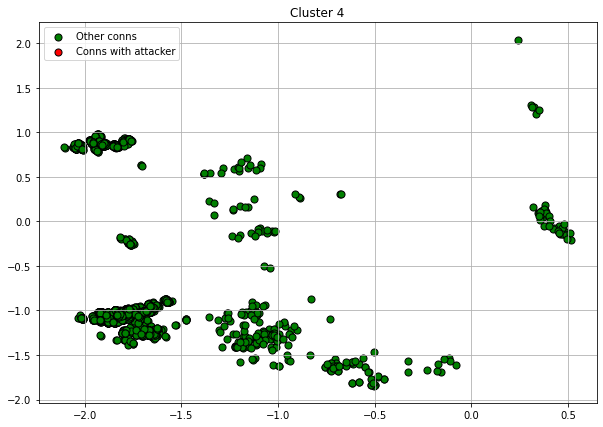

Total num of conns: 5994

Attacker conns ratio:
No    5994
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    1417
192.168.10.9     1033
192.168.10.19     716
192.168.10.15     649
192.168.10.12     600
192.168.10.17     455
192.168.10.16     388
192.168.10.25     238
192.168.10.5      206
192.168.10.51     146
192.168.10.8      118
192.168.10.50      28
Name: originated_ip, dtype: int64

192.168.10.3      5878
192.168.10.19       73
192.168.10.255      37
224.0.0.251          6
Name: responded_ip, dtype: int64

Cluster 4 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
18463,1.00000,192.168.10.14,0.85747,192.168.10.3,2017-07-06T13:19:47.931783Z,0.83001,0.06502,0.00005,udp,dns,SF,0.76452,50103,orig_reg_or_dyn,0.00021,132,0.00003,4,0.00078,53,resp_53,0.00000,252,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
38927,1.00000,192.168.10.19,0.85747,192.168.10.3,2017-07-06T13:11:16.157925Z,0.68784,0.00021,0.00000,udp,dns,SF,0.99191,65004,orig_reg_or_dyn,0.00007,46,0.00001,2,0.00078,53,resp_53,0.00000,46,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
25503,1.00000,192.168.10.14,0.85747,192.168.10.3,2017-07-06T13:04:24.805632Z,0.57358,0.02395,0.00002,udp,dns,SF,0.96911,63510,orig_reg_or_dyn,0.00012,76,0.00001,2,0.00078,53,resp_53,0.00000,296,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1742,1.00000,192.168.10.17,0.85747,192.168.10.3,2017-07-06T13:04:56.278331Z,0.58232,0.00021,0.00000,udp,dns,SF,0.63973,41925,orig_reg_or_dyn,0.00017,104,0.00001,2,0.00078,53,resp_53,0.00000,220,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
35977,1.00000,192.168.10.14,0.85747,192.168.10.3,2017-07-06T13:04:24.436844Z,0.57347,0.12168,0.00009,udp,dns,SF,0.91718,60107,orig_reg_or_dyn,0.00024,148,0.00003,4,0.00078,53,resp_53,0.00000,224,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
37885,1.00000,192.168.10.16,0.85747,192.168.10.3,2017-07-06T13:11:44.613609Z,0.69575,0.00019,0.00000,udp,dns,SF,0.66871,43824,orig_reg_or_dyn,0.00013,80,0.00001,2,0.00078,53,resp_53,0.00000,156,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
8457,1.00000,192.168.10.19,0.85747,192.168.10.3,2017-07-06T13:08:18.0164Z,0.63836,0.00016,0.00000,udp,dns,SF,0.56900,37290,orig_reg_or_dyn,0.00007,46,0.00001,2,0.00078,53,resp_53,0.00000,46,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
6764,1.00000,192.168.10.8,0.85747,192.168.10.3,2017-07-06T12:59:36.950345Z,0.49361,0.00015,0.00000,udp,dns,SF,0.93388,61201,orig_reg_or_dyn,0.00011,66,0.00001,2,0.00078,53,resp_53,0.00000,98,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
25330,1.00000,192.168.10.14,0.85747,192.168.10.3,2017-07-06T13:19:50.943614Z,0.83085,0.00023,0.00000,udp,dns,SF,0.89550,58686,orig_reg_or_dyn,0.00019,120,0.00001,2,0.00078,53,resp_53,0.00000,376,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
6054,1.00000,192.168.10.15,0.85747,192.168.10.3,2017-07-06T13:06:52.886199Z,0.61471,0.00086,0.00000,udp,dns,SF,0.83544,54750,orig_reg_or_dyn,0.00013,78,0.00001,2,0.00078,53,resp_53,0.00000,208,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    5927
tcp      67
Name: protocol, dtype: int64

Service:
dns                   5819
ntp                     76
none                    48
krb                     20
gssapi,dce_rpc,smb      11
gssapi,smb,krb           9
krb_tcp                  7
gssapi,ntlm,smb          2
dce_rpc                  2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    5838
orig_well_known     156
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            5707
resp_well_known     189
resp_123             76
resp_reg             21
resp_dyn              1
Name: resp_p_cat, dtype: int64




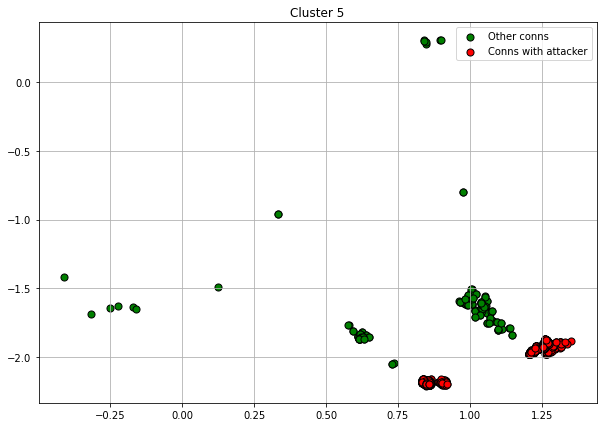

Total num of conns: 1729

Attacker conns ratio:
Yes    1557
No      172
Name: attacker_label, dtype: int64

IPs:
172.16.0.1        1557
192.168.10.8        26
192.168.10.5        22
192.168.10.15       22
192.168.10.17       20
192.168.10.16       20
192.168.10.14       16
192.168.10.12       12
192.168.10.9        10
192.168.10.51        9
192.168.10.25        7
192.168.10.19        6
109.201.130.57       1
109.201.130.58       1
Name: originated_ip, dtype: int64

192.168.10.50    1720
192.168.10.19       7
192.168.10.12       2
Name: responded_ip, dtype: int64

Cluster 5 NOK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
27586,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:58:11.122594Z,0.46977,5.49109,0.00403,tcp,none,SF,0.76515,50144,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00002,3,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
26662,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:40:00.396068Z,0.16678,5.87842,0.00432,tcp,none,SF,0.50826,33310,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
31749,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T13:23:43.604346Z,0.89548,5.12773,0.00376,tcp,none,SF,0.87032,57036,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
24206,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T13:18:43.174408Z,0.81202,5.47122,0.00402,tcp,none,SF,0.82173,53852,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
11015,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:32:21.239705Z,0.03923,5.90048,0.00433,tcp,none,SF,0.83165,54502,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
31863,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:48:43.684373Z,0.31214,5.76188,0.00423,tcp,none,SF,0.63144,41382,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
19789,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:51:23.383202Z,0.35651,5.10629,0.00375,tcp,none,SF,0.66929,43862,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
28765,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:46:40.788185Z,0.27800,5.61349,0.00412,tcp,none,SF,0.60251,39486,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
19233,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:47:55.447466Z,0.29874,5.98228,0.00439,tcp,none,SF,0.62003,40634,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
13914,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:39:33.744476Z,0.15938,5.52193,0.00405,tcp,none,SF,0.50201,32900,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes


Cluster 5 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
36635,1.00000,192.168.10.25,0.85747,192.168.10.19,2017-07-06T13:14:17.956225Z,0.73835,0.05019,0.00004,tcp,"gssapi,dce_rpc,smb",SF,0.76066,49850,orig_reg_or_dyn,0.00199,1244,0.00033,52,0.00211,139,resp_well_known,0.00000,1588,0.00016,28,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
6757,1.00000,192.168.10.15,0.85747,192.168.10.50,2017-07-06T12:52:27.648766Z,0.37436,0.18180,0.00013,tcp,ftp,SF,0.80653,52856,orig_reg_or_dyn,0.00014,88,0.00014,22,0.00028,21,resp_21,0.00000,220,0.00016,28,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
17397,1.00000,192.168.10.16,0.85747,192.168.10.50,2017-07-06T13:13:03.70145Z,0.71772,1.31874,0.00097,tcp,ssh,SF,0.78425,51396,orig_reg_or_dyn,0.00214,1332,0.00031,48,0.00030,22,resp_22,0.00001,3477,0.00026,46,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
8274,1.00000,192.168.10.15,0.85747,192.168.10.50,2017-07-06T12:34:27.429561Z,0.07429,0.03506,0.00003,tcp,ftp-data,SF,0.78480,51432,orig_reg_or_dyn,0.01644,10257,0.00012,19,0.50132,32274,resp_reg,0.00000,0,0.00006,10,0.00000,0.00000,0.00000,0.00000,0.00990,No,Yes
1132,1.00000,192.168.10.9,0.85747,192.168.10.50,2017-07-06T13:24:20.080407Z,0.90561,1.46407,0.00107,tcp,ssh,SF,0.03829,2512,orig_reg_or_dyn,0.00206,1284,0.00024,38,0.00030,22,resp_22,0.00001,3477,0.00025,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
12448,1.00000,192.168.10.51,0.85747,192.168.10.50,2017-07-06T13:13:59.512403Z,0.73322,1.31685,0.00097,tcp,ssh,SF,0.68909,45160,orig_reg_or_dyn,0.00214,1332,0.00028,44,0.00030,22,resp_22,0.00001,3477,0.00025,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
38269,1.00000,192.168.10.8,0.85747,192.168.10.50,2017-07-06T13:22:07.30579Z,0.86873,0.15276,0.00011,tcp,ftp,SF,0.76265,49980,orig_reg_or_dyn,0.00014,88,0.00014,22,0.00028,21,resp_21,0.00000,218,0.00016,28,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
20603,1.00000,192.168.10.12,0.85747,192.168.10.50,2017-07-06T13:19:01.86768Z,0.81721,1.32547,0.00097,tcp,ssh,SF,0.85579,56084,orig_reg_or_dyn,0.00214,1332,0.00028,44,0.00030,22,resp_22,0.00001,3477,0.00025,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
22048,1.00000,192.168.10.12,0.85747,192.168.10.50,2017-07-06T13:22:55.786275Z,0.88219,1.27921,0.00094,tcp,ssh,SF,0.85610,56104,orig_reg_or_dyn,0.00214,1332,0.00028,44,0.00030,22,resp_22,0.00001,3477,0.00025,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
15310,1.00000,192.168.10.5,0.85747,192.168.10.50,2017-07-06T13:25:53.795544Z,0.93164,1.32777,0.00097,tcp,ssh,SF,0.77537,50814,orig_reg_or_dyn,0.00211,1316,0.00024,38,0.00030,22,resp_22,0.00001,3317,0.00023,42,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes


Protocol:
tcp     1727
icmp       2
Name: protocol, dtype: int64

Service:
none                  1432
http                   127
ssh                    107
ftp                     28
ftp-data                28
gssapi,dce_rpc,smb       7
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1727
orig_well_known       2
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            1557
resp_22             107
resp_21              28
resp_reg             21
resp_well_known       9
resp_dyn              7
Name: resp_p_cat, dtype: int64




In [80]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Interpretation

Parallel coordinates plots.

In [81]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

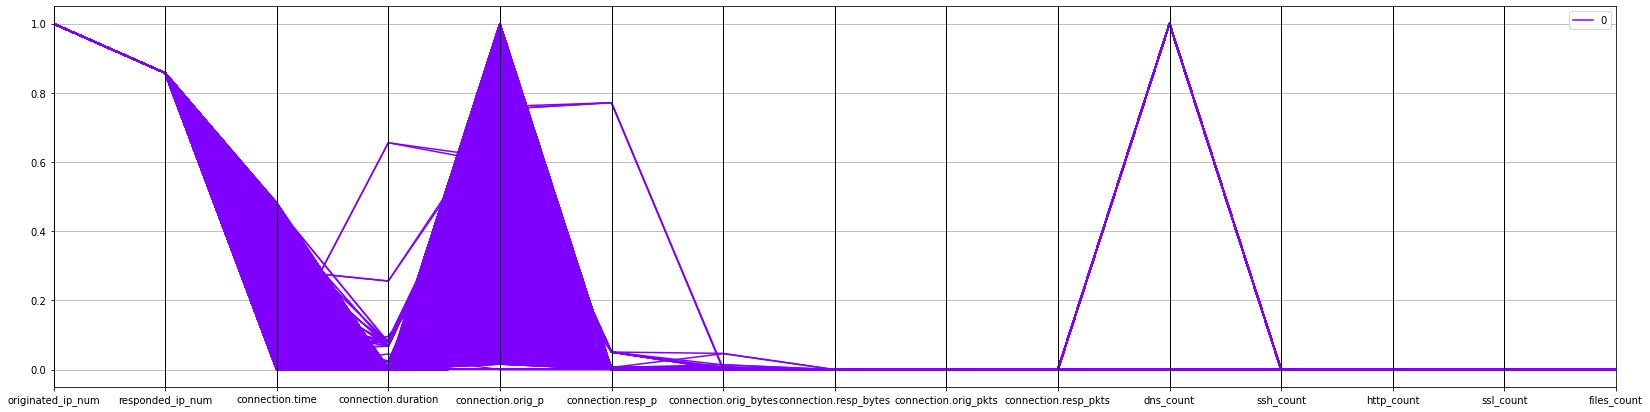

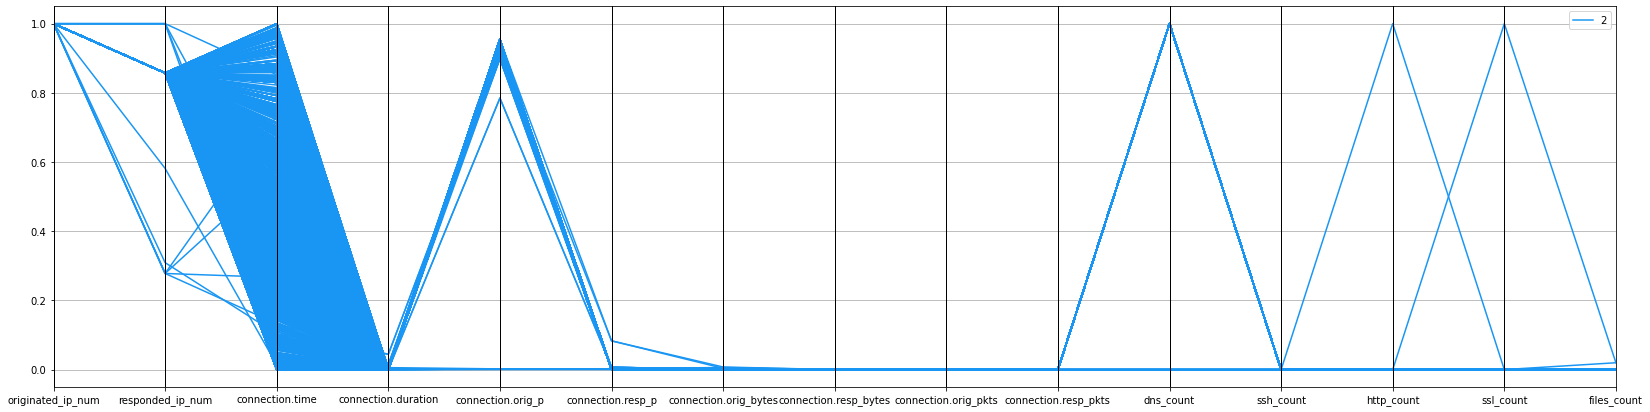

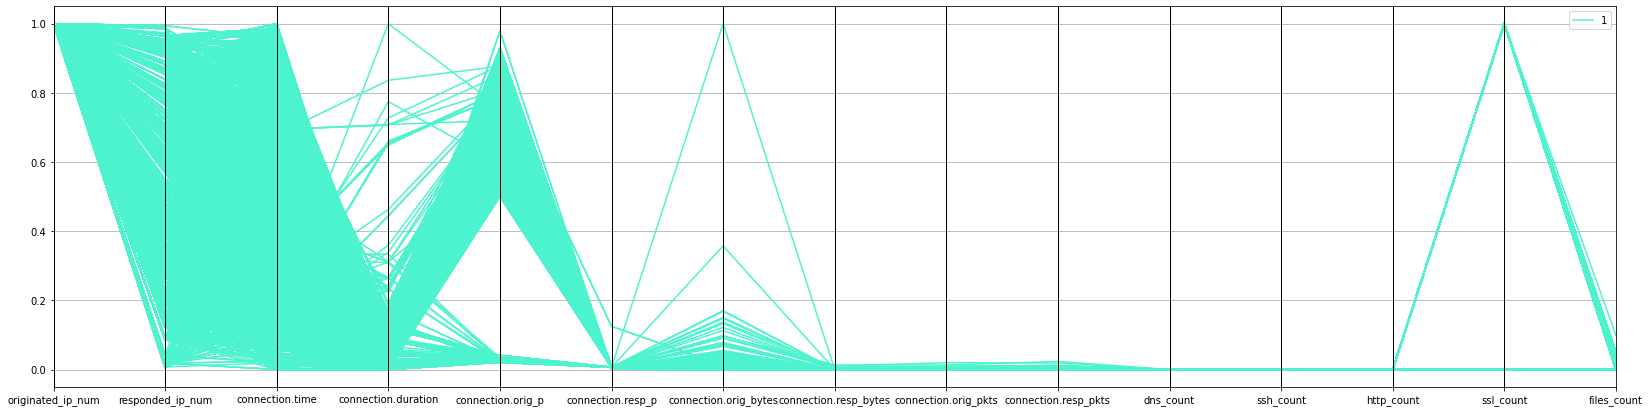

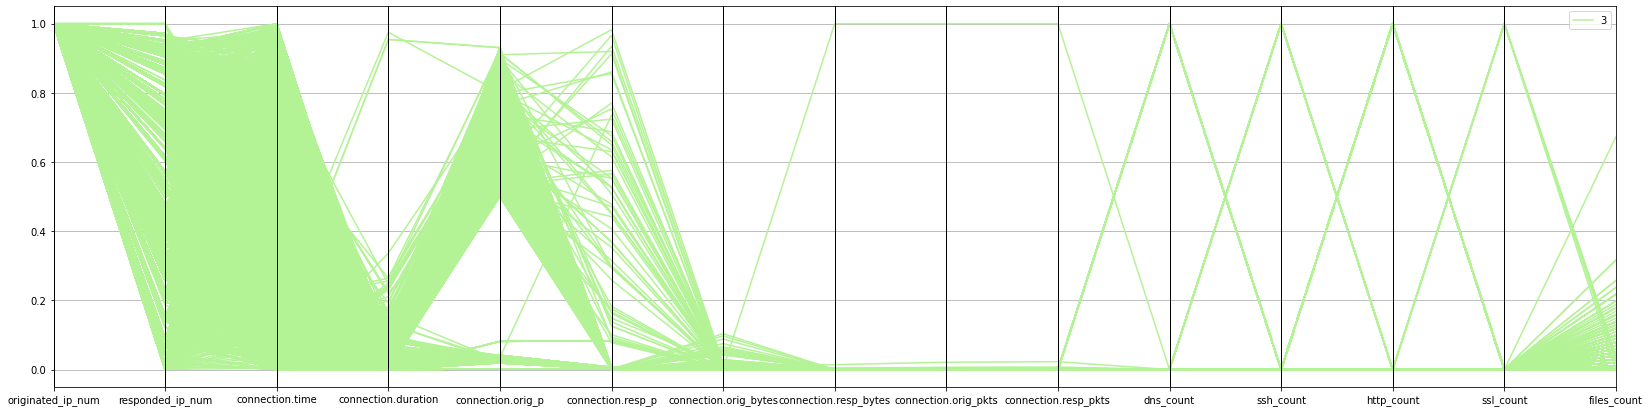

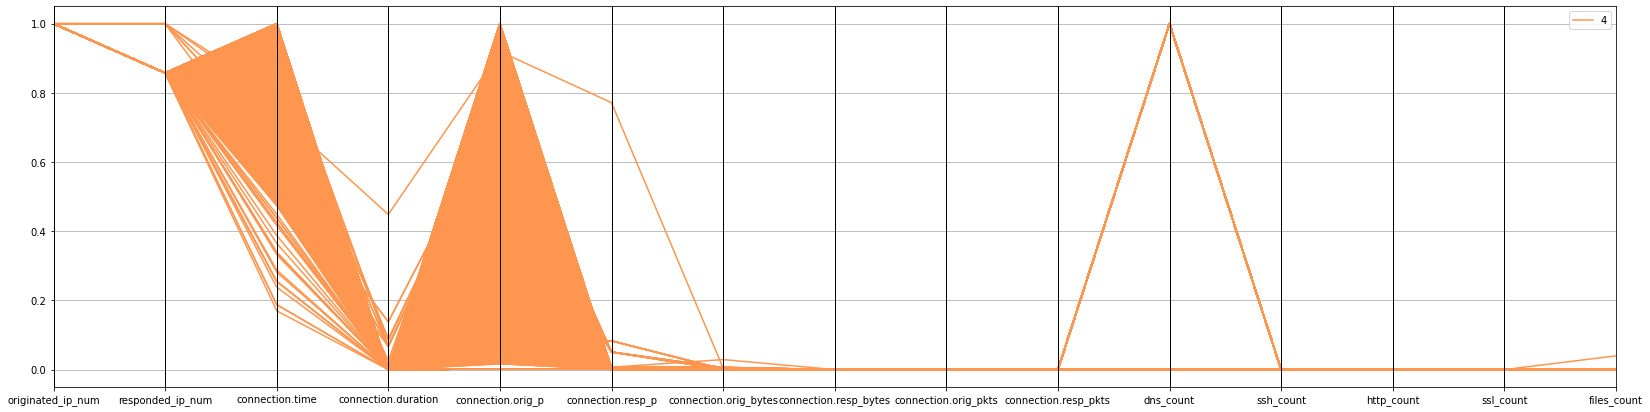

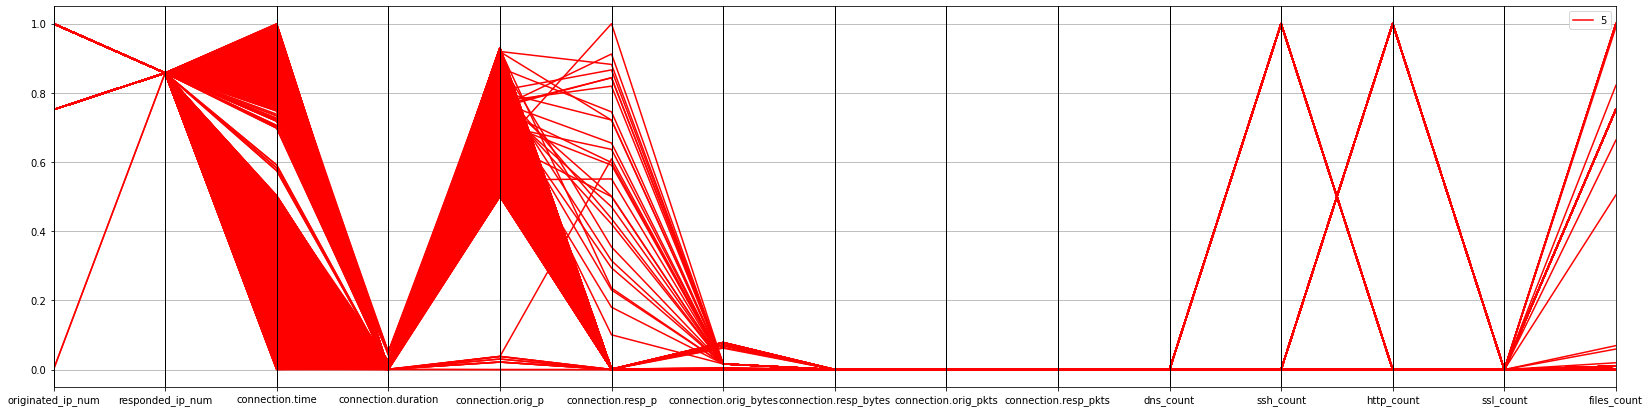

In [82]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

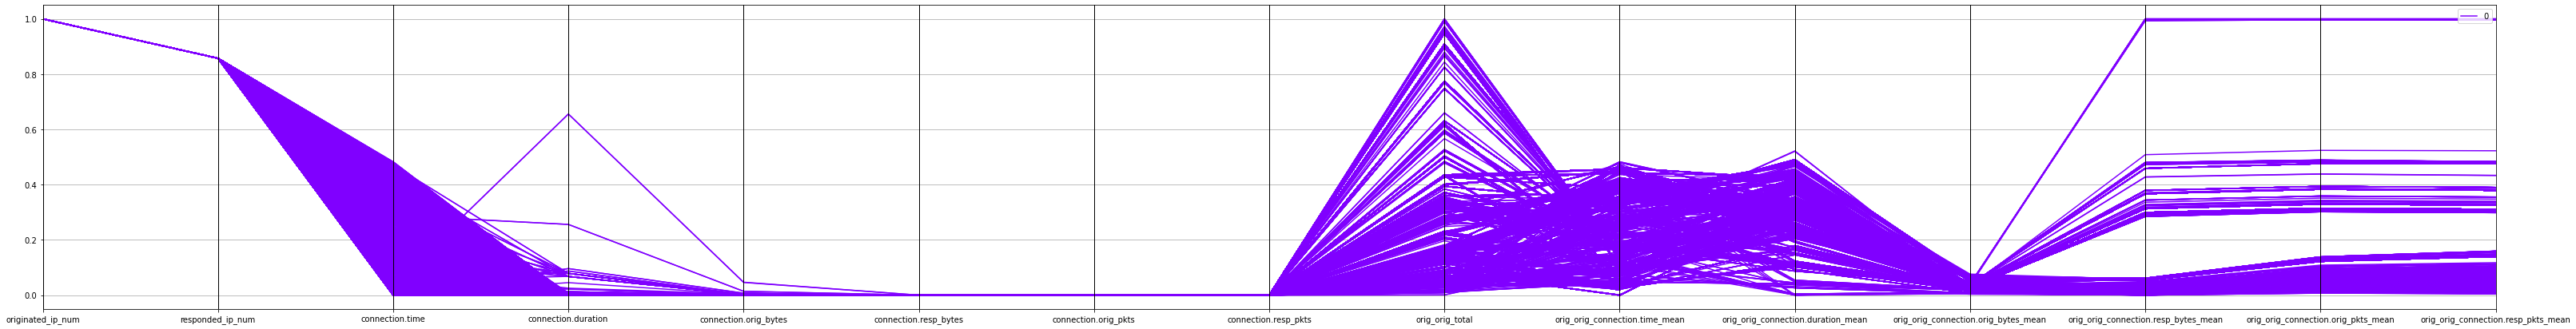

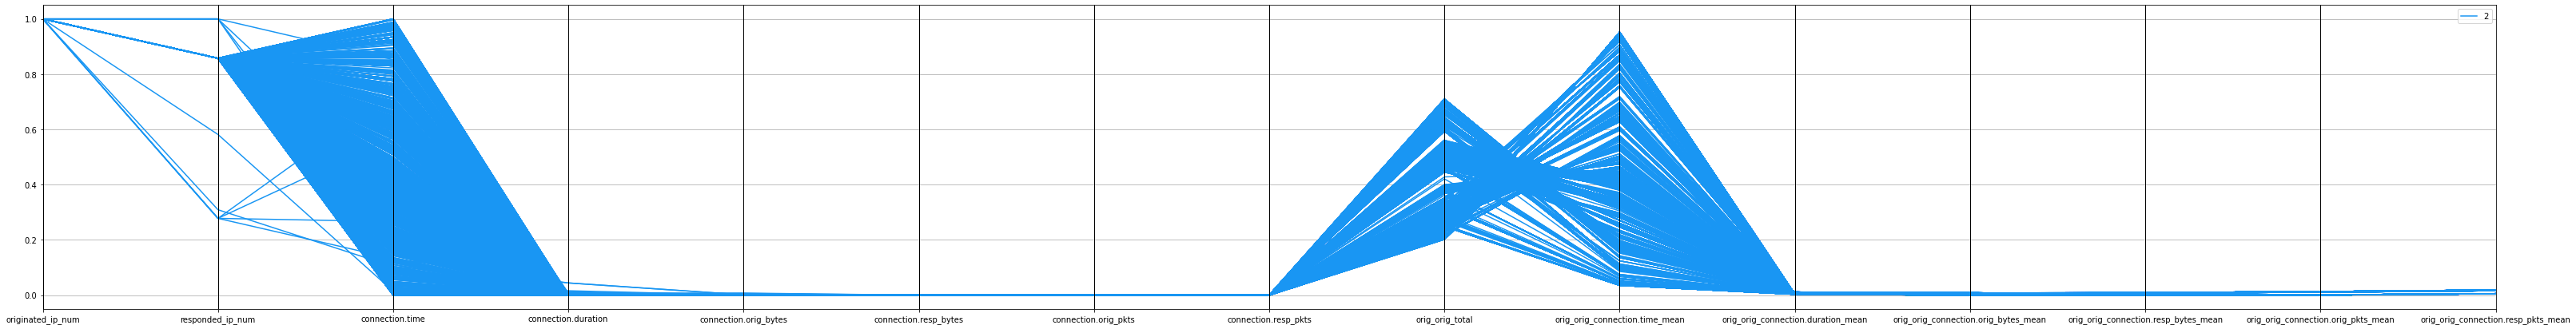

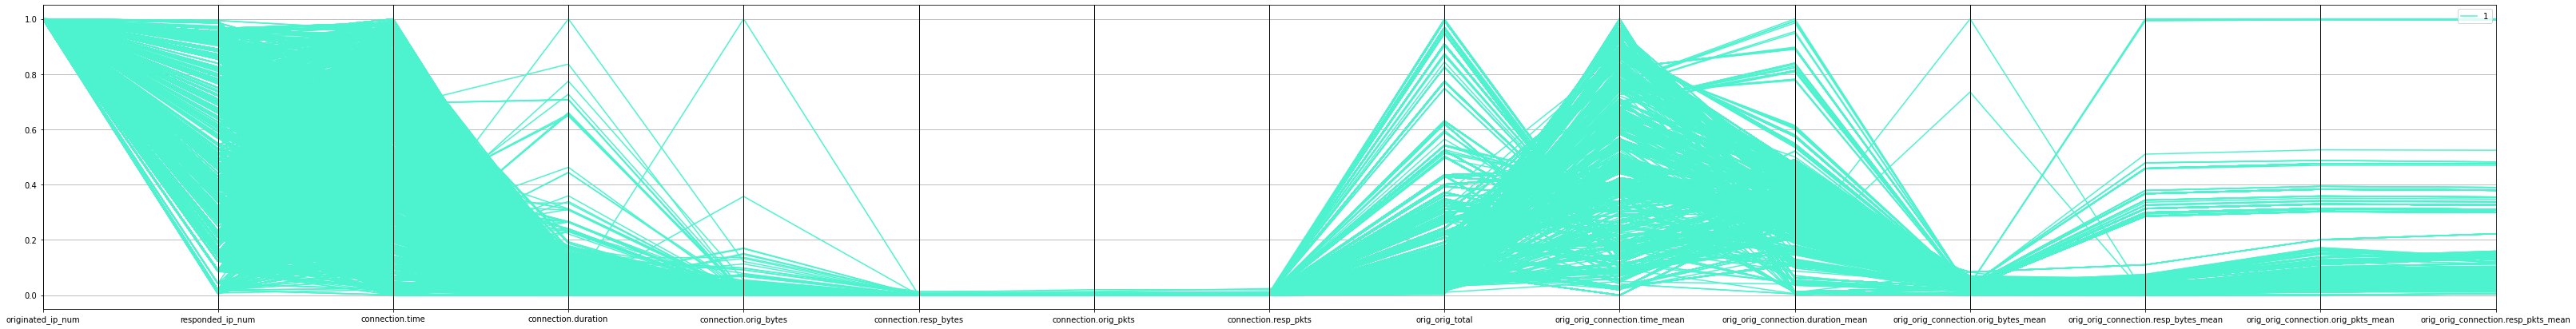

In [ ]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()